<h3>1. Vertebral Column Data Set</h3>
<p>This Biomedical data set was built by Dr. Henrique da Mota during a medical residence
period in Lyon, France. Each patient in the data set is represented in the data set
by six biomechanical attributes derived from the shape and orientation of the pelvis
and lumbar spine (in this order): pelvic incidence, pelvic tilt, lumbar lordosis angle,
sacral slope, pelvic radius and grade of spondylolisthesis. The following convention is
used for the class labels: DH (Disk Hernia), Spondylolisthesis (SL), Normal (NO) and
Abnormal (AB). In this exercise, we only focus on a binary classification task NO=0
and AB=1.<br/><br/>
<i>(a) Downloaded the Vertebral Column Data Set from: https://archive.ics.uci.edu/ml/datasets/Vertebral+Column </i></p>


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
sns.set(style="ticks", color_codes=True)
df = pd.read_table('ass1_data/data.dat',header=None,names=['pelvic_incidence numeric','pelvic_tilt numeric','lumbar_lordosis_angle numeric','sacral_slope numeric','pelvic_radius numeric','degree_spondylolisthesis numeric','Class'], index_col=False,sep='\s+')


In [3]:
df.head()

,pelvic_incidence numeric,pelvic_tilt numeric,lumbar_lordosis_angle numeric,sacral_slope numeric,pelvic_radius numeric,degree_spondylolisthesis numeric,Class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB


In [4]:
df.shape # size of the data frame 

(310, 7)

<b><i>(b) Pre-Processing and Exploratory data analysis: </i>
<br/>
i. Making scatterplots of the independent variables in the dataset. Using color to
show Classes 0 and 1.</b>


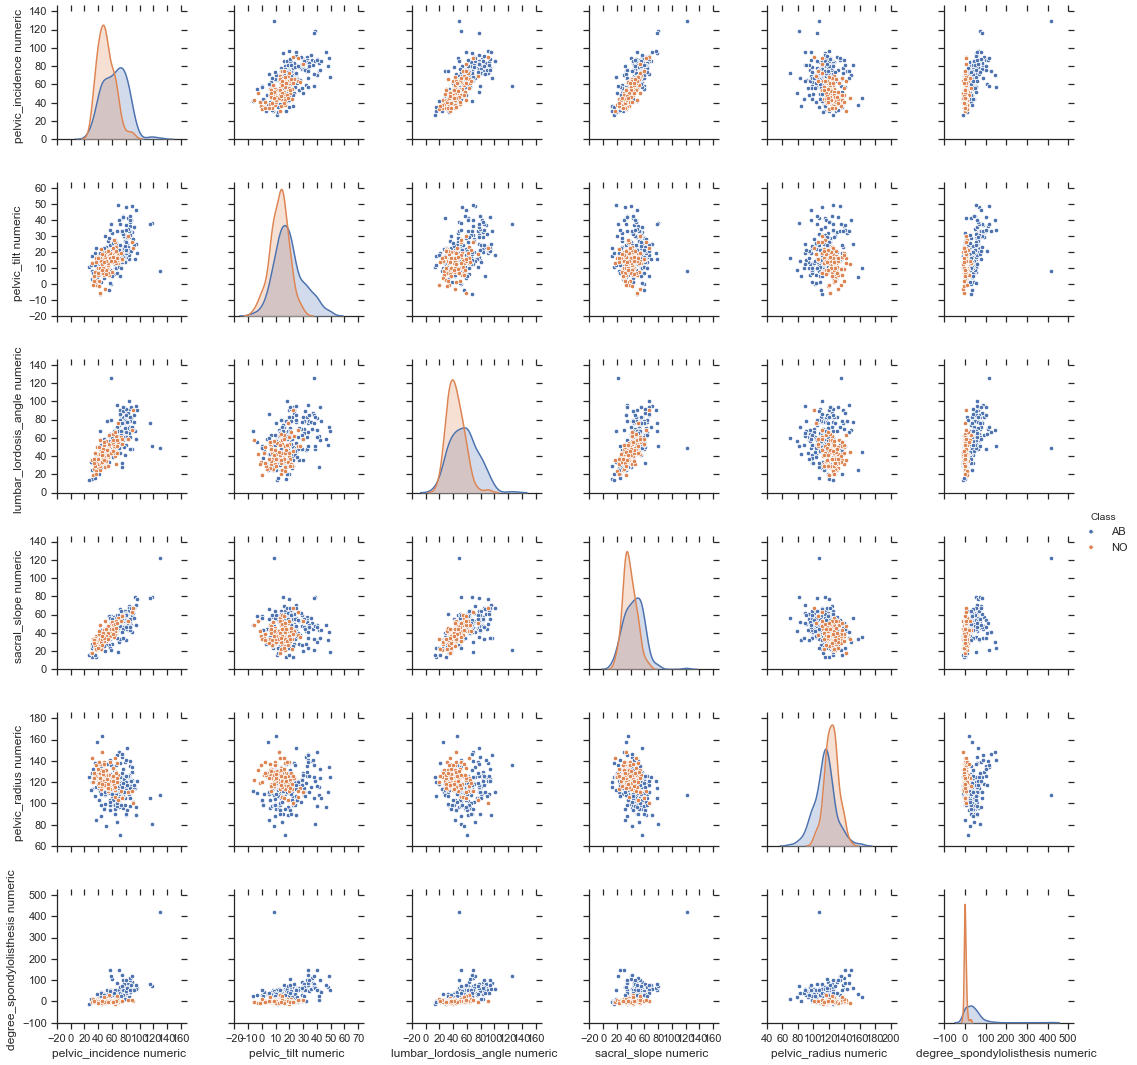

In [5]:
#Scatter plot of the datd
g = sns.pairplot(df, hue="Class")


<b>ii. Making boxplots for each of the independent variables. Using color to show
Classes 0 and 1</b>

Axes(0.125,0.125;0.775x0.775)


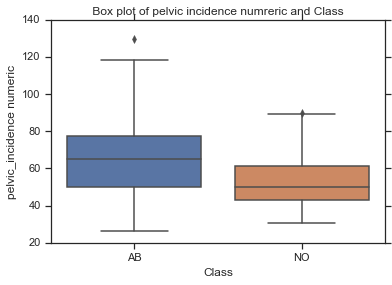

In [6]:
plt.title(" Box plot of pelvic incidence numreric and Class ")
print(sns.boxplot(x=df["Class"], y=df.ix[:,0],data=df)) 


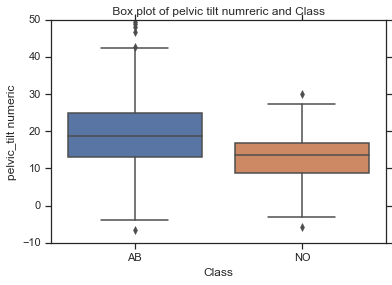

In [7]:
plt.title(" Box plot of pelvic tilt numreric and Class ")
sns.boxplot(x=df.ix[:,6], y=df.ix[:,1],data=df) 

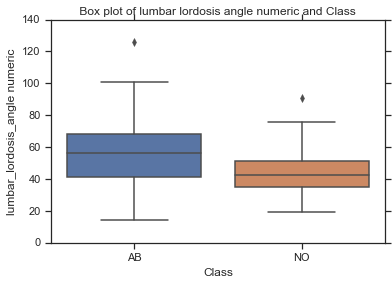

In [8]:
plt.title(" Box plot of lumbar lordosis angle numeric and Class ")
sns.boxplot(x=df.ix[:,6], y=df.ix[:,2],data=df) 

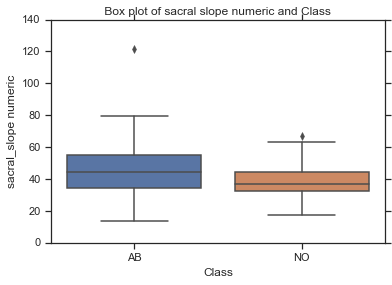

In [9]:
plt.title(" Box plot of sacral slope numeric and Class ")
sns.boxplot(x=df.ix[:,6], y=df.ix[:,3],data=df) 

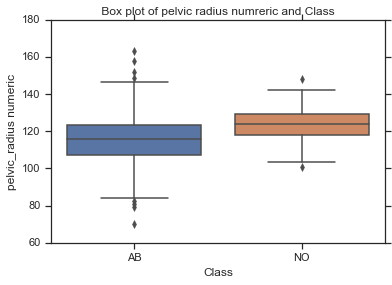

In [10]:
plt.title(" Box plot of pelvic radius numreric and Class ")
sns.boxplot(x=df.ix[:,6], y=df.ix[:,4],data=df) 

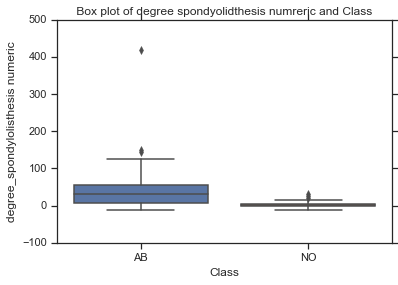

In [11]:
plt.title(" Box plot of degree spondyolidthesis numreric and Class ")
sns.boxplot(x=df.ix[:,6], y=df.ix[:,5],data=df) 

<h4>Converting categorical values to binary </h4>

In [12]:
df['outcome'] = np.where(df['Class']=='AB', 1, 0)
df2=df.drop('Class',axis=1)
df2.reset_index(drop=True)
df2.head()

,pelvic_incidence numeric,pelvic_tilt numeric,lumbar_lordosis_angle numeric,sacral_slope numeric,pelvic_radius numeric,degree_spondylolisthesis numeric,outcome
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [13]:
ab_data = df2[df2['outcome']==1] 
no_data = df2[df2['outcome']==0]


In [14]:
no_data.head()

,pelvic_incidence numeric,pelvic_tilt numeric,lumbar_lordosis_angle numeric,sacral_slope numeric,pelvic_radius numeric,degree_spondylolisthesis numeric,outcome
210,38.51,16.96,35.11,21.54,127.63,7.99,0
211,54.92,18.97,51.60,35.95,125.85,2.00,0
212,44.36,8.95,46.90,35.42,129.22,4.99,0
213,48.32,17.45,48.00,30.87,128.98,-0.91,0
214,45.70,10.66,42.58,35.04,130.18,-3.39,0


<b>iii. Selecting the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.</b>

In [15]:
tr_tmp =  no_data[:70] 
test_tmp =no_data[70:]
train_data=tr_tmp.append(ab_data[:140] , ignore_index=True)
test_data=test_tmp.append(ab_data[140:],ignore_index=True)
x_train= train_data.drop('outcome',axis=1).values
y_train = train_data['outcome'].values 
x_test= test_data.drop('outcome',axis=1).values
y_test=test_data['outcome'].values 
print (" x train size: {} \n y train_size: {} \n x test size :{} \n y test size:{}".format(x_train.shape , y_train.shape ,x_test.shape, y_test.shape))


 x train size: (210L, 6L) 
 y train_size: (210L,) 
 x test size :(100L, 6L) 
 y test size:(100L,)


<b><i>(c) Classification using KNN on Vertebral Column Data Set</i><br/><br/>
i.k-nearest neighbors with Euclidean metric</b>



In [16]:
neighbors=range(208,-1,-3)


In [17]:
train_error = {}
test_error = {}
for k in neighbors:
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        knn.fit(x_train,y_train) 
        train_error[k] =1 - knn.score(x_train, y_train) 
        test_error[k] = 1 -knn.score(x_test, y_test)
tr_index= min(train_error,key=train_error.get)
index=min(test_error,key=test_error.get)
print(index,test_error[index])
print(tr_index,train_error[tr_index])
      

(4, 0.060000000000000053)
(1, 0.0)


<b>ii. Testing all the data in the test database with k nearest neighbors. Decisions
taken by majority polling. Plotting train and test errors in terms of k for
k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). 
    
Which k\* is the most suitable k among those values ? Calculate
the confusion matrix, true positive rate, true negative rate, precision,
and F-score when k = k\*</b>

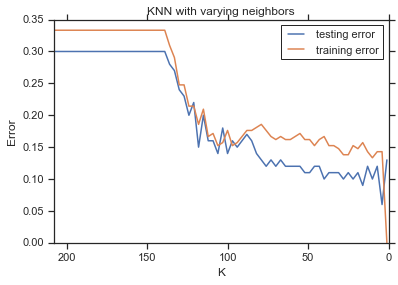

In [18]:
plt.title("KNN with varying neighbors")
plt.plot(*zip(*sorted(test_error.items())),label='testing error')
plt.plot(*zip(*sorted(train_error.items())),label='training error')
plt.xlim(208,0)
plt.legend()
#plt.xticks(np.arange(1,210,10))
plt.xlabel('K')
plt.ylabel('Error')
plt.show()


In [19]:
knn= KNeighborsClassifier(n_neighbors = 4,metric='euclidean' )
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(knn.score(x_test,y_pred))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


1.0
0.94


In [55]:
from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
#sensitivity= float(cm[0,0])/float((cm[0,0]+cm[1,0]))


In [61]:
sensitivity = float(cm[0,0])/float(cm[0,0]+cm[1,0])
print("true positive rate :{}".format(sensitivity ))

specificity = float(cm[1,1])/float(cm[1,1]+cm[0,1])
print("true negative rate : {}".format(specificity))

true positive rate :0.961538461538
true negative rate : 0.932432432432


In [62]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.96      0.83      0.89        30
          1       0.93      0.99      0.96        70

avg / total       0.94      0.94      0.94       100



<b>iii. Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plotting the best test error rate, which is obtained by some value of k, against the size of training set, when the
size of training set is N ∈ {10, 20, 30, . . . , 210}.
<br/><br/>
Note: for each N, selecting training set by choosing the first bN/3c rows of Class 0 and the first
N − bN/3c rows of Class 1 in the training set created in 1(b)iii. Also, for
each N, selecting the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve. </b>

In [63]:
N = range(10,220,10)
neigh = range(1,201,5)
print neigh,N


[1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196] [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]


In [64]:
error = {}
for i in range(10,220,10):
    data_1 = train_data[train_data['outcome']==1]
    data_0 =  train_data[train_data['outcome']==0]
    train_tmp2 = data_1[:2*i/3]
    test_tmp2 = data_1[2*i/3:]
    train_data2=train_tmp2.append(data_0[:i/3])
    test_data2= test_tmp2.append(data_0[i/3:])
    x_train2= train_data2.drop('outcome',axis=1).values
    y_train2 = train_data2['outcome'].values 
    tes_error ={}
    for k2 in neigh:
        #print k2,i
        if k2>=len(train_data2): 
            break
        else:      
            knn = KNeighborsClassifier(n_neighbors=k2,metric='euclidean')
            knn.fit(x_train2,y_train2)
            tes_error[k2]=1-knn.score(x_test, y_test)
    error[i]=tes_error[min(tes_error,key=tes_error.get)]
    #print(min(tes_error,key=tes_error.get))

[(10, 0.23999999999999999), (20, 0.18999999999999995), (30, 0.21999999999999997), (40, 0.25), (50, 0.30000000000000004), (60, 0.29000000000000004), (70, 0.29000000000000004), (80, 0.29000000000000004), (90, 0.29000000000000004), (100, 0.28000000000000003), (110, 0.21999999999999997), (120, 0.17000000000000004), (130, 0.16000000000000003), (140, 0.15000000000000002), (150, 0.13), (160, 0.13), (170, 0.13), (180, 0.099999999999999978), (190, 0.089999999999999969), (200, 0.089999999999999969), (210, 0.07999999999999996)]


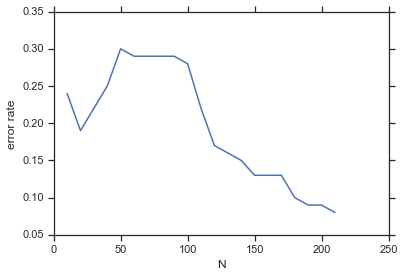

In [65]:
print sorted(error.items()) 
plt.xlabel('N')
plt.ylabel('error rate')
plt.plot(*zip(*sorted(error.items())))


<b><i> d) Replacing the Euclidean metric with the following metrics and testing them. Summarizing
the test errors (i.e., when k = k \* ) in a table. Using all of training data
and selecting the best k when {1, 6, 11, . . . , 196}. </i><br/><br/>
i. Minkowski Distance:<br/></b>
    A. which becomes Manhattan Distance with p = 1.


In [66]:
#d(A)
tr_error3={}
tes_error3={}
for k3 in neigh :
        knn = KNeighborsClassifier(n_neighbors=k3,p=1,metric='minkowski')
        knn.fit(x_train,y_train)        
        tr_error3[k3] =1 - knn.score(x_train, y_train) 
        tes_error3[k3] = 1 -knn.score(x_test, y_test)
tr_index3 = min(tr_error3,key=tr_error3.get)        
index3=min(tes_error3,key=tes_error3.get)
print(index3,1-tes_error3[index3])
print(tr_index3,tr_error3[tr_index3])
error_rates={'manhattan':tes_error3[index3]}

(6, 0.89000000000000001)
(1, 0.0)


<b>i. Minkowski Distance:<br/></b>
B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k\* you found
for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [67]:
# d(B)
import math
tr_error4={}
tes_error4={}
arr=np.arange(0.1,1.1,0.1)
for value in arr:
    P=math.exp(value*math.log(10))
    knn = KNeighborsClassifier(n_neighbors=index3,p=P,metric='minkowski')
    knn.fit(x_train,y_train)        
    #tr_error4[value]=1 - knn.score(x_train, y_train) 
    tes_error4[value] = 1 -knn.score(x_test, y_test)
        
index4=min(tes_error4,key=tes_error4.get)
#print index4
print(math.fabs(index4),tes_error4[index4])


(0.6, 0.060000000000000053)


<b>i. Minkowski Distance:<br/></b>
C. which becomes Chebyshev Distance with p → ∞

In [68]:
#d(c)
tr_error5={}
tes_error5={}
for k5 in neigh :
        knn = KNeighborsClassifier(n_neighbors=k5,metric='chebyshev')
        knn.fit(x_train,y_train)        
        tr_error5[k5] =1 - knn.score(x_train, y_train) 
        tes_error5[k5] = 1 -knn.score(x_test, y_test)
tr_index5=min(tr_error5,key=tr_error5.get)       
index5=min(tes_error5,key=tes_error5.get)
print(index5,1-tes_error5[index5])
print(tr_index5,tr_error5[tr_index5])
error_rates["chebyshev"]=tes_error5[index5]


(16, 0.92000000000000004)
(1, 0.0)


<b>ii. Mahalanobis Distance:<br/></b>

In [69]:
#d(II)
tr_error6={}
tes_error6={}
inverse = np.linalg.pinv(x_train)
for k6 in neigh :
        knn = KNeighborsClassifier(n_neighbors=k6,algorithm ='brute',metric='mahalanobis', metric_params={'V': inverse})
        knn.fit(x_train,y_train)        
        tr_error6[k6] =1 - knn.score(x_train, y_train) 
        tes_error6[k6] = 1 -knn.score(x_test, y_test)
        
index6=min(tes_error6,key=tes_error6.get)
print(index6,1-tes_error6[index6])



(6, 0.83999999999999997)


In [70]:
error_rates["Mahalanobis"]=tes_error6[index6]

import tabulate
header = ['distance', 'error values']
rows =  [(keys,v) for keys,v in error_rates.items()]
print tabulate.tabulate(rows, header)

distance       error values
-----------  --------------
chebyshev              0.08
Mahalanobis            0.16
manhattan              0.11


<b><i>(e) The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is proportional to its distance from the query/test
data point. In this case, closer neighbors of a query point will have a greater
influence than neighbors which are further away. Using weighted voting with Euclidean,
Manhattan, and Chebyshev distances and reported the best test errors when
k ∈ {1, 6, 11, 16, . . . , 196}.<b/><i/><br/><br/>

1.Weighted Euclidean 


In [71]:

tr_error7={}
tes_error7={}
for k7 in neigh :
        knn = KNeighborsClassifier(n_neighbors=k7,metric='euclidean',weights='distance')
        knn.fit(x_train,y_train)        
        tr_error7[k7] =1 - knn.score(x_train, y_train) 
        tes_error7[k7] = 1 -knn.score(x_test, y_test)
        
index7=min(tes_error7,key=tes_error7.get)
print(index7,1-tes_error7[index7])


(6, 0.90000000000000002)


<b>2. Weighted Minkowski<b/> 

In [72]:

tr_error8={}
tes_error8={}
for k8 in neigh :
        knn = KNeighborsClassifier(n_neighbors=k8,p=1,metric='minkowski',weights='distance')
        knn.fit(x_train,y_train)        
        tr_error8[k8] =1 - knn.score(x_train, y_train) 
        tes_error8[k8] = 1 -knn.score(x_test, y_test)
        
index8=min(tes_error8,key=tes_error8.get)
print(index8,1-tes_error8[index8])

(26, 0.90000000000000002)


<b>3. weighted chebyshev</b> 

In [73]:

tr_error9={}
tes_error9={}
for k9 in neigh :
        knn = KNeighborsClassifier(n_neighbors=k9,metric='chebyshev',weights='distance')
        knn.fit(x_train,y_train)        
        tr_error9[k9] =1 - knn.score(x_train, y_train) 
        tes_error9[k9] = 1 -knn.score(x_test, y_test)
        
index9=min(tes_error9,key=tes_error9.get)
print(index9,1-tes_error9[index9])


(16, 0.89000000000000001)


<b>(f) The lowest training error rate I achieved in this exercise</b>

euclidean has the least test error rate as seen in c(ii) which is 0.06 and training rate is 0